<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Ridge Regression
</h1><center/>

**Link to the article** :  https://medium.com/@soulawalid/l2-regularization-ridge-regression-cf073e3e67fd?sk=6a3e9daed4aa04464f4e2d47e5e4081f

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Generate some data
X = np.random.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Linear relationship with noise

# Convert to DataFrame for easy handling
df = pd.DataFrame({'X': X.squeeze(), 'y': y})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
# Create Ridge Regression model
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate model using MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 3.79


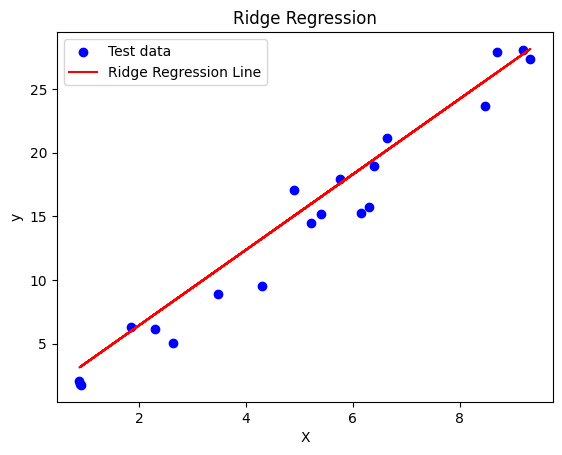

In [4]:
# Plot the data points
plt.scatter(X_test, y_test, color='blue', label='Test data')

# Plot the Lasso regression line
plt.plot(X_test, y_pred, color='red', label='Ridge Regression Line')

plt.title('Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
# Define the model and parameters
ridge = Ridge()
parameters = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Best parameters and score
print(f'Best Alpha: {grid_search.best_params_}')
print(f"Mean Squared Error: {mse:.2f}")

Best Alpha: {'alpha': 0.1}
Mean Squared Error: 3.78


In [6]:
best_ridge

Ridge(alpha=0.1)